<a href="https://colab.research.google.com/github/emandrade/emandrade.github.io/blob/main/cursoMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Entrenando el primer modelo

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/examples/courses/udacity_intro_to_tensorflow_for_deep_learning/l02c01_celsius_to_fahrenheit.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/examples/courses/udacity_intro_to_tensorflow_for_deep_learning/l02c01_celsius_to_fahrenheit.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

¡Bienvenido a este Colab donde entrenará su primer modelo de aprendizaje automático!

Intentaremos mantener las cosas simples aquí y solo presentaremos conceptos básicos. Más adelante, Colabs cubrirá problemas más avanzados.

El problema que resolveremos es convertir de Celsius a Fahrenheit, donde la fórmula aproximada es:

$$ f = c \times 1.8 + 32 $$


Por supuesto, sería bastante simple crear una función Python convencional que realice directamente este cálculo, pero eso no sería aprendizaje automático.


En su lugar, le daremos a TensorFlow algunos valores Celsius de muestra (0, 8, 15, 22, 38) y sus valores Fahrenheit correspondientes (32, 46, 59, 72, 100).
Luego, entrenaremos un modelo que descubra la fórmula anterior a través del proceso de capacitación.

## Importando dependencias

Primero, importe TensorFlow. Aquí, lo llamamos `tf` para facilitar su uso. También le decimos que solo muestre errores.

A continuación, importe [NumPy] (http://www.numpy.org/) como `np`. Numpy nos ayuda a representar nuestros datos como listas de alto rendimiento.

In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np

## Seteando training data

Como vimos antes, el aprendizaje automático supervisado se trata de descubrir un algoritmo dado un conjunto de entradas y salidas. Dado que la tarea en este Codelab es crear un modelo que pueda dar la temperatura en Fahrenhet cuando se dan los grados en Celsius, creamos dos listas `celsius_q` y` fahrenheit_a` que podemos usar para entrenar nuestro modelo.

In [2]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

for i,c in enumerate(celsius_q):
  print("{} degrees Celsius = {} degrees Fahrenhet".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenhet
-10.0 degrees Celsius = 14.0 degrees Fahrenhet
0.0 degrees Celsius = 32.0 degrees Fahrenhet
8.0 degrees Celsius = 46.0 degrees Fahrenhet
15.0 degrees Celsius = 59.0 degrees Fahrenhet
22.0 degrees Celsius = 72.0 degrees Fahrenhet
38.0 degrees Celsius = 100.0 degrees Fahrenhet


### Alguna terminología de aprendizaje automático

  - ** Feature ** - La (s) entrada (s) a nuestro modelo. En este caso, un solo valor: los grados en Celsius.

  - ** Label **: la salida que predice nuestro modelo. En este caso, un solo valor: los grados en Fahrenhet.
 
  - ** Ejemplo **: un par de entradas / salidas utilizadas durante el entrenamiento. En nuestro caso, un par de valores de `celsius_q` y` fahrenhet_a` en un índice específico, como `(22,72)`.



## Crea el modelo

A continuación, cree el modelo. Usaremos el modelo más simple posible que podamos, una red densa. Dado que el problema es sencillo, esta red requerirá solo una capa, con una sola neurona.

### Construye una capa

Llamaremos a la capa `l0` y la crearemos instanciando` tf.keras.layers.Dense` con la siguiente configuración:

* `input_shape = [1]` - Esto especifica que la entrada a esta capa es un valor único. Es decir, la forma es una matriz unidimensional con un miembro. Dado que esta es la primera (y única) capa, esa forma de entrada es la forma de entrada de todo el modelo. El valor único es un número de punto flotante, que representa grados centígrados.

* `unidades = 1` - Esto especifica el número de neuronas en la capa. El número de neuronas define cuántas variables internas tiene la capa para intentar aprender a resolver el problema (más adelante). Dado que esta es la capa final, también es el tamaño de la salida del modelo: un único valor flotante que representa grados Fahrenheit. (En una red de varias capas, el tamaño y la forma de la última tendrían que coincidir con la `input_shape` de la siguiente capa).

In [4]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])  

### Ensamblar capas en el modelo

Una vez que se definen las capas, deben ensamblarse en un modelo. La definición del modelo secuencial toma una lista de capas como argumento, especificando el orden de cálculo desde la entrada hasta la salida.

Este modelo tiene una sola capa, l0.

In [5]:
model = tf.keras.Sequential([l0])

**Nota**

A menudo verá las capas definidas dentro de la definición del modelo, en lugar de hacerlo de antemano:

```python
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])
```

## Compila el modelo, con funciones de pérdida y optimizador

Antes del entrenamiento, se debe compilar el modelo. Cuando se compila para el entrenamiento, se proporciona el modelo:

-  **Loss function** : una forma de medir qué tan lejos están las predicciones del resultado deseado. (La diferencia medida se llama "pérdida".

- **Optimizer function**  - Una forma de ajustar los valores internos para reducir la pérdida.

In [6]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

Estos se utilizan durante el entrenamiento (`model.fit ()`, a continuación) para calcular primero la pérdida en cada punto y luego mejorarla. De hecho, el acto de calcular la pérdida actual de un modelo y luego mejorarlo es precisamente lo que es el entrenamiento.

Durante el entrenamiento, la función del optimizador se utiliza para calcular los ajustes a las variables internas del modelo. El objetivo es ajustar las variables internas hasta que el modelo (que en realidad es una función matemática) refleje la ecuación real para convertir grados Celsius a Fahrenheit.

TensorFlow usa análisis numérico para realizar este ajuste, y toda esta complejidad está oculta para usted, por lo que no entraremos en detalles aquí. Lo que es útil saber sobre estos parámetros son:

La función de pérdida ([error cuadrático medio] (https://en.wikipedia.org/wiki/Mean_squared_error)) y el optimizador ([Adam] (https://machinelearningmastery.com/adam-optimization-algorithm-for-deep -learning /)) que se utilizan aquí son estándar para modelos simples como este, pero hay muchos otros disponibles. No es importante saber cómo funcionan estas funciones específicas en este momento.

Una parte del Optimizador en la que quizás deba pensar cuando cree sus propios modelos es la tasa de aprendizaje ("0.1" en el código anterior). Este es el tamaño de paso que se toma al ajustar los valores en el modelo. Si el valor es demasiado pequeño, se necesitarán demasiadas iteraciones para entrenar el modelo. Demasiado grande y la precisión disminuye. Encontrar un buen valor a menudo implica algo de prueba y error, pero el rango suele estar entre 0,001 (predeterminado) y 0,1

## Entrenando al modelo

Entrene el modelo llamando al método `fit`.

Durante el entrenamiento, el modelo toma valores en grados Celsius, realiza un cálculo usando las variables internas actuales (llamadas "pesos") y genera valores que deben ser el equivalente en Fahrenheit. Dado que los pesos se establecen inicialmente de forma aleatoria, la salida no se acercará al valor correcto. La diferencia entre la salida real y la salida deseada se calcula utilizando la función de pérdida, y la función del optimizador indica cómo se deben ajustar los pesos.

Este ciclo de calcular, comparar y ajustar se controla mediante el método de "ajuste". El primer argumento son las entradas, el segundo argumento son las salidas deseadas. El argumento `epochs` especifica cuántas veces se debe ejecutar este ciclo, y el argumento` verbose` controla la cantidad de salida que produce el método.

In [7]:
history = model.fit(celsius_q, fahrenheit_a, epochs=700, verbose=False)
print("Finished training the model")

Finished training the model


## Mostrar estadísticas de entrenamiento

El método `fit` devuelve un objeto histórico. Podemos usar este objeto para trazar cómo disminuye la pérdida de nuestro modelo después de cada época de entrenamiento. Una pérdida alta significa que los grados Fahrenheit que predice el modelo están lejos del valor correspondiente en `fahrenheit_a`.

Usaremos [Matplotlib] (https://matplotlib.org/) para visualizar esto (podría usar otra herramienta). Como puede ver, nuestro modelo mejora muy rápidamente al principio, y luego tiene una mejora constante y lenta hasta que está muy cerca de ser "perfecto" hacia el final.



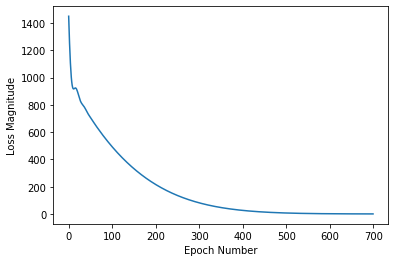

In [8]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

## Usa el modelo para predecir valores

Ahora tienes un modelo que ha sido entrenado para aprender la relación entre `celsius_q` y` fahrenheit_a`. Puede usar el método de predicción para que calcule los grados Fahrenheit para grados Celsius previamente desconocidos.

Entonces, por ejemplo, si el valor Celsius es 200, ¿cuál crees que será el resultado Fahrenheit? Adivine antes de ejecutar este código.

In [14]:
print(model.predict([85]))

[[184.62807]]


La respuesta correcta es $ 100 \ times 1.8 + 32 = 212 $, por lo que nuestro modelo está funcionando muy bien.

### Para revisar


* Creamos un modelo con una capa densa
* Lo entrenamos con 3500 ejemplos (7 pares, más de 500 épocas).

Nuestro modelo sintonizó las variables (pesos) en la capa Densa hasta que pudo devolver el valor Fahrenheit correcto para cualquier valor Celsius. (Recuerde, 100 grados Celsius no formaban parte de nuestros datos de entrenamiento).




## Mirando los pesos de las capas

Finalmente, imprimamos las variables internas de la capa Densa.

In [15]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.8024863]], dtype=float32), array([31.416733], dtype=float32)]


La primera variable está cerca de ~ 1.8 y la segunda de ~ 32. Estos valores (1.8 y 32) son las variables reales en la fórmula de conversión real.

Esto está muy cerca de los valores de la fórmula de conversión. Explicaremos esto en un próximo video donde mostraremos cómo funciona una capa Densa, pero para una sola neurona con una sola entrada y una sola salida, la matemática interna se ve igual que [la ecuación de una línea] (https: / /en.wikipedia.org/wiki/Linear_equation#Slope%E2%80%93intercept_form), $ y = mx + b $, que tiene la misma forma que la ecuación de conversión, $ f = 1.8c + 32 $.

Dado que la forma es la misma, las variables deben converger en los valores estándar de 1.8 y 32, que es exactamente lo que sucedió.

Con neuronas adicionales, entradas adicionales y salidas adicionales, la fórmula se vuelve mucho más compleja, pero la idea es la misma.

### Un pequeño experimento

Solo por diversión, ¿qué pasaría si creáramos más capas densas con diferentes unidades, que por lo tanto también tiene más variables?

In [17]:
l0 = tf.keras.layers.Dense(units=5, input_shape=[1])  
l1 = tf.keras.layers.Dense(units=5)  
l2 = tf.keras.layers.Dense(units=4)  
l3 = tf.keras.layers.Dense(units=1)  
model = tf.keras.Sequential([l0, l1, l2, l3])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=5000, verbose=False)
print("Finished training the model")
print(model.predict([100]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model.predict([100.0])))
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
[[211.74197]]
Model predicts that 100 degrees Celsius is: [[211.74197]] degrees Fahrenheit
These are the l0 variables: [array([[-0.45894635, -0.728719  ,  0.14861837, -0.03323628, -0.01459386]],
      dtype=float32), array([-3.8724933 , -4.441646  ,  3.617026  ,  2.769607  ,  0.62603223],
      dtype=float32)]
These are the l1 variables: [array([[-0.5064544 ,  0.8060104 ,  0.3114273 ,  0.13638844,  0.15663293],
       [ 0.23170054,  1.1305081 ,  0.02420565, -0.05189027, -0.1191116 ],
       [-0.5525498 , -0.5424865 ,  0.5395022 , -0.1978792 , -0.3311546 ],
       [-0.37804684, -0.10396834, -0.07891478, -0.14643657, -0.39169148],
       [ 0.03906095,  0.00941649,  0.11561742,  0.31984556,  0.03011456]],
      dtype=float32), array([ 3.6560392 , -4.6987133 , -0.01976104,  4.0270495 ,  3.532205  ],
      dtype=float32)]
These are the l2 variables: [array([[-0.14510238,  0.19326416, -0.5259852 , -0.09512248],
       [ 0.03832814, -0.05527312, -0.08234589,  1.350

Como puede ver, este modelo también puede predecir muy bien el valor Fahrenheit correspondiente. Pero cuando observa las variables (pesos) en las capas l0 y l1, no se acercan ni siquiera a ~ 1.8 y ~ 32. La complejidad adicional oculta la forma "simple" de la ecuación de conversión.

#Modelos preentrenados y tfjs (ahora si la vida es más sencilla)

En los ejemplos que vimos de piedra, papel o tijera o en el ejemplo de NLU con NLP no desarrollamos redes neuronales desde 0 sino que lo que hicimos fué utilizar transfer learning o modelos preentrenados. 
Como vimos en el ejemplo de más arriba, donde usamos redes neuronales en lenguaje Python, se emplea mucho tiempo en llegar a los pesos necesarios para tener una salida que haga mínimo el error, esto implica que si queremos usar AI en celulares o máquinas que no tienen mucha capacidad de procesamiento vamos a invertir mucho tiempo en lograr la convergencia del algoritmo. Para solucionar este problema (y para hacer nuestra vida más sencilla) exsiten lo modelos preentrenados. En dichos modelos los pesos de la red neuronal se cargan de una base de datos y no tenemos que realizar el proceso de entranamiento, además podemos usar javascript que es un lenguaje que se interpreta en cualquier navegador e inclusive en celulares, la pricipal ventaja de esto último es la posibilidad de obtener modelos personalizados con un entrenamiento mínimo y con una muy baja capacidad de procesarmiento.


Dejamos a continuación los links al curso TensorFlow from zero to hero, dictado por el Google's advocate Luaurence Moroney

[Parte 1](https://youtu.be/KNAWp2S3w94)

[Parte 2](https://youtu.be/bemDFpNooA8)

[Parte 3](https://youtu.be/x_VrgWTKkiM)